In [49]:
import yfinance
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
amzn_data = yfinance.Ticker("AMZN")
amzn_data

yfinance.Ticker object <AMZN>

In [40]:
amzn_df = amzn_data.history(period="max", interval="1d")
amzn_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-27 00:00:00-05:00,225.600006,226.029999,220.899994,223.750000,27367100,0.0,0.0
2024-12-30 00:00:00-05:00,220.059998,223.000000,218.429993,221.300003,28321200,0.0,0.0
2024-12-31 00:00:00-05:00,222.970001,223.229996,218.940002,219.389999,24819700,0.0,0.0


In [41]:
amzn_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6955 entries, 1997-05-15 00:00:00-04:00 to 2025-01-03 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6955 non-null   float64
 1   High          6955 non-null   float64
 2   Low           6955 non-null   float64
 3   Close         6955 non-null   float64
 4   Volume        6955 non-null   int64  
 5   Dividends     6955 non-null   float64
 6   Stock Splits  6955 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 434.7 KB


In [42]:
amzn_df.shape

(6955, 7)

In [43]:
amzn_df = amzn_df.loc[:, ['Close', 'Volume']]
amzn_df

,Close,Volume
Date,,
1997-05-15 00:00:00-04:00,0.097917,1443120000
1997-05-16 00:00:00-04:00,0.086458,294000000
1997-05-19 00:00:00-04:00,0.085417,122136000
1997-05-20 00:00:00-04:00,0.081771,109344000
1997-05-21 00:00:00-04:00,0.071354,377064000
...,...,...
2024-12-27 00:00:00-05:00,223.750000,27367100
2024-12-30 00:00:00-05:00,221.300003,28321200
2024-12-31 00:00:00-05:00,219.389999,24819700


In [44]:
# to check for null values
amzn_df.describe()

,Close,Volume
count,6955.000000,6.955000e+03
mean,39.816012,1.365170e+08
std,56.823665,1.377185e+08
min,0.069792,9.744000e+06
25%,2.102250,6.348900e+07
50%,8.956500,1.008720e+08
75%,69.500000,1.557070e+08
max,232.929993,2.086584e+09


In [45]:
amzn_df['SMA 10'] = amzn_df.rolling(window=10)['Close'].mean()
amzn_df['SMA 50'] = amzn_df.rolling(window=50)['Close'].mean()
amzn_df

,Close,Volume,SMA 10,SMA 50
Date,,,,
1997-05-15 00:00:00-04:00,0.097917,1443120000,NaN,NaN
1997-05-16 00:00:00-04:00,0.086458,294000000,NaN,NaN
1997-05-19 00:00:00-04:00,0.085417,122136000,NaN,NaN
1997-05-20 00:00:00-04:00,0.081771,109344000,NaN,NaN
1997-05-21 00:00:00-04:00,0.071354,377064000,NaN,NaN
...,...,...,...,...
2024-12-27 00:00:00-05:00,223.750000,27367100,226.517999,208.5618
2024-12-30 00:00:00-05:00,221.300003,28321200,225.901999,209.2372
2024-12-31 00:00:00-05:00,219.389999,24819700,224.548000,209.8452


In [46]:
amzn_df.dropna(inplace=True)
amzn_df

,Close,Volume,SMA 10,SMA 50
Date,,,,
1997-07-25 00:00:00-04:00,0.111458,12408000,0.111901,0.088641
1997-07-28 00:00:00-04:00,0.116146,51480000,0.112839,0.089005
1997-07-29 00:00:00-04:00,0.123958,96288000,0.113047,0.089755
1997-07-30 00:00:00-04:00,0.122396,50352000,0.113620,0.090495
1997-07-31 00:00:00-04:00,0.119792,29088000,0.114505,0.091255
...,...,...,...,...
2024-12-27 00:00:00-05:00,223.750000,27367100,226.517999,208.561800
2024-12-30 00:00:00-05:00,221.300003,28321200,225.901999,209.237200
2024-12-31 00:00:00-05:00,219.389999,24819700,224.548000,209.845200


In [47]:
amzn_df['SMA Ratio'] = amzn_df['SMA 10'] / amzn_df['SMA 50']
amzn_df.drop(labels=['SMA 10', 'SMA 50'], axis=1, inplace=True)
amzn_df

,Close,Volume,SMA Ratio
Date,,,
1997-07-25 00:00:00-04:00,0.111458,12408000,1.262414
1997-07-28 00:00:00-04:00,0.116146,51480000,1.267776
1997-07-29 00:00:00-04:00,0.123958,96288000,1.259503
1997-07-30 00:00:00-04:00,0.122396,50352000,1.255540
1997-07-31 00:00:00-04:00,0.119792,29088000,1.254781
...,...,...,...
2024-12-27 00:00:00-05:00,223.750000,27367100,1.086095
2024-12-30 00:00:00-05:00,221.300003,28321200,1.079645
2024-12-31 00:00:00-05:00,219.389999,24819700,1.070065


In [48]:
amzn_df.describe()

,Close,Volume,SMA Ratio
count,6906.000000,6.906000e+03,6906.000000
mean,40.097892,1.365759e+08,1.024687
std,56.925941,1.370609e+08,0.110266
min,0.102083,9.744000e+06,0.617761
25%,2.131063,6.369400e+07,0.973338
50%,9.084500,1.010220e+08,1.025389
75%,71.563124,1.556890e+08,1.071114
max,232.929993,2.086584e+09,1.746507


<Axes: xlabel='Date'>

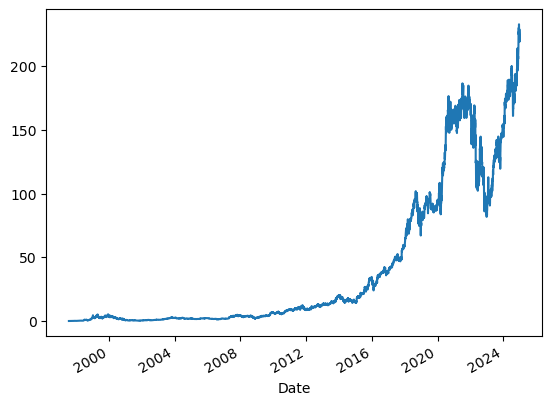

In [54]:
amzn_df['Close'].plot()

<Axes: >

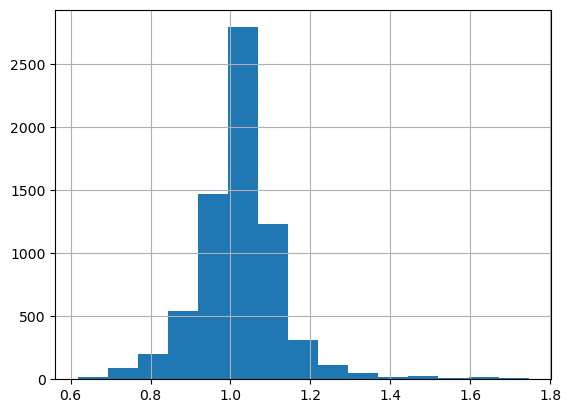

In [56]:
amzn_df['SMA Ratio'].hist(bins=15)